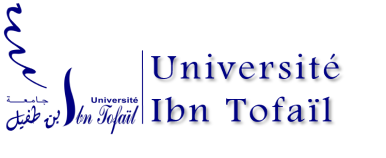

<center><h1 style="color:rgb(0,0,128); font-family:algerian;font-size:30px;"> TP 3: Régression régularisée & Perceptron </h1></center>

<B>l'objectifs : </B>
- 1- différencier entre les deux régression ridge et lasso
- 2- progremer un perceptron
- 3- Comprendre la régression logistique
- 4- maitriser les conceptes de base d'un reseau neurone 

<hr style="border:2px solid black">

<h2 style="text-align:center; font-family:Caveat;font-size:50px;">I- Régression régularisée : <span style="color:blue">RIDGE </span> et <span style="color:red">LASSO </span></h2>

<hr style="border:2px solid black">

- Nous allons générer des données aléatoires avec la tendance linéaire  make_regression: on a un dataset (x,y) qui contient 100 exemples, et deux variables x1 et x2 (n_features=2) et une bruit de 10 . 
- Note:Utiliser np.random.seed(0) pour reproduire le meme Dataset a chaque fois.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [4]:
x,y=make_regression(n_samples=100,n_features=2,noise=10)

In [6]:
#vérifier les dimensions de x et y. ( On corrige le probleme avec np.reshape )
x.shape

(100, 2)

In [9]:
y=y.reshape(100,1)

In [10]:
y.shape

(100, 1)

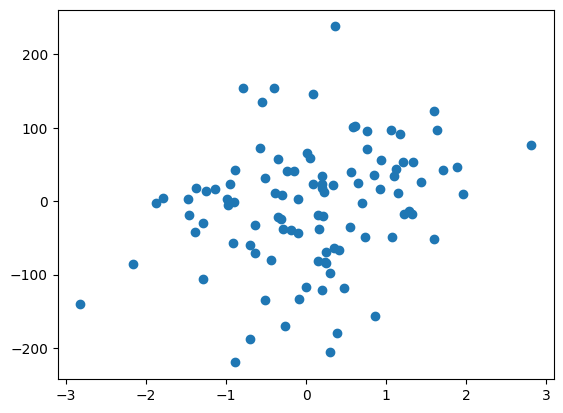

In [11]:
#afficher les résultats. X1 en abscisse et y en ordonnée
x1=x[:,0]
y1=y
plt.scatter(x1,y)

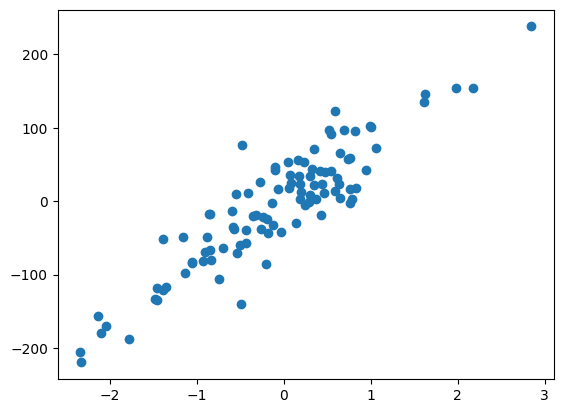

In [12]:
#afficher les résultats. X2 en abscisse et y en ordonnée
x2=x[:,1]
y2=y
plt.scatter(x2,y)

<h3>qu'est-ce que vous remarquez à partir ces deux résultats ?</h3>

In [13]:
#utiliser la bibliothèque Scikit-Learn pour générer un modèle de régression linéaire
from sklearn.linear_model import LinearRegression
model_reg=LinearRegression()
#entraîner le modèle crée (utiliser la fonction fit())
model_reg.fit(x,y)

LinearRegression()

In [14]:
#afficher les parametres du modele (model.coef_ et model.intercept_)
model_reg.coef_

array([[33.57721532, 84.79858204]])

In [15]:
model_reg.intercept_

array([-1.26605918])

In [16]:
# c = 0 alors f=f1+f2
f1=x1*model_reg.coef_[0,0]
f2=x2*model_reg.coef_[0,1]

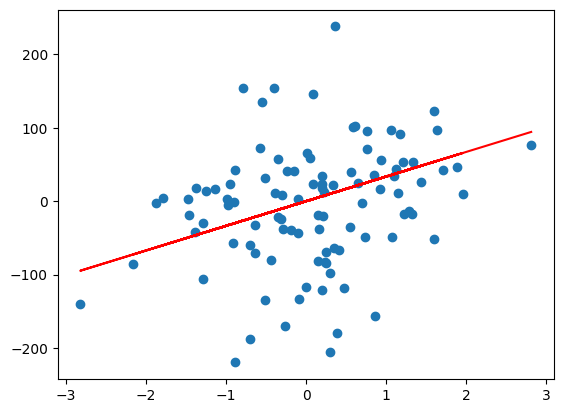

In [17]:
#afficher le model entrainée (x1,y1)
plt.scatter(x1, y)
plt.plot(x1,f1, c='red')

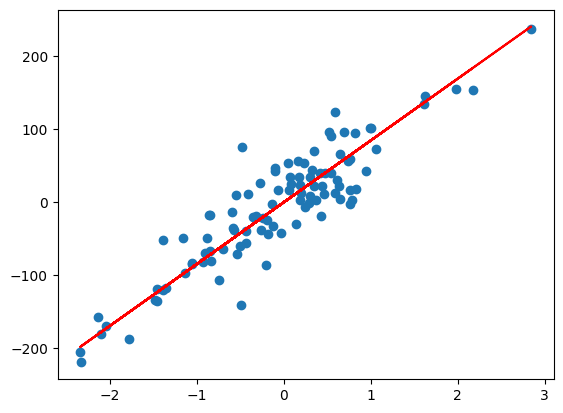

In [18]:
#afficher le model entrainée (x2,y1)
plt.scatter(x2, y)
plt.plot(x2,f2, c='red')

<h3>Régression ridge</h3>

Principe rendre les valeurs des paramètres plus homogènes et moins grand chaque paramètre a un rôle dans la prédiction 

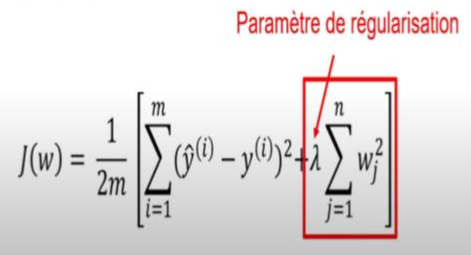

In [27]:
# utiliser la bibliothèque Scikit-Learn pour générer un modèle de régression Ridge avec lambda = alpha  
from sklearn.linear_model import Ridge
model_ridge=Ridge(alpha=100)

In [28]:
#entraîner le modèle crée (utiliser la fonction fit())
model_ridge.fit(x,y)
#afficher les parametres du modele (model.coef_ et model.intercept_)
model_ridge.coef_
#refaire les mêmes calculs avec Alpha=10,20,60


array([[13.25117808, 38.49224192]])

<h3 style="color:blue">qu'est-ce que vous remarquez lorsqu'on alpha est grand  ?</h3>

In [36]:
#Quelles sont les variables qui influencent le modèle predict ?
#note:comparer les paramètres du modèle lors de changement de Alpha


'....................................................................\n....................................................................\n....................................................................'

<h3>Régression Lasso</h3>

Principe Ajouter un terme de pénalité à la fonction cout afin de minimiser l’erreur et tendre vers 0 les paramètres qui n’ont pas d’utilité dans le modèle  

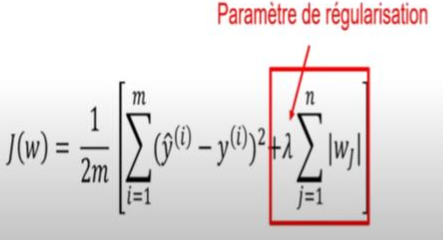

In [34]:
# utiliser la bibliothèque Scikit-Learn pour générer un modèle de régression Lasso avec lambda = alpha  
from sklearn.linear_model import Lasso
model_lasoo=Lasso(alpha=30)

In [35]:
#entraîner le modèle crée (utiliser la fonction fit())
model_lasoo.fit(x,y)
#afficher les parametres du modele (model.coef_ et model.intercept_)
model_lasoo.coef_
#refaire les mêmes calculs avec Alpha=10,20,60


array([ 0.        , 45.99318055])

<h3 style="color:blue">qu'est-ce que vous remarquez lorsqu'on alpha est grand  ?</h3>

In [ ]:
#Quelles sont les variables qui influencent le modèle predict ?
#note:comparer les paramètres du modèle lors de changement de Alpha
....................................................................
....................................................................
....................................................................

<hr style="border:3px black solid">

<h2 style="text-align:center; font-family:Caveat;font-size:70px;">II- Perceptron</h2>

<hr style="border:3px black solid">

<p style="border:2px rgb rgb(0,0,128) solid; padding:10px 5px; text-align:center;">On va essayer de développer un programme capable de reconnaître une plante toxique ou pas à partir de la longueur et la largeur de la feuille</p>

<h2 style="text-align:center; font-family:Caveat;font-size:40px;"> prétraitement</h2>

<hr style="border:3px black solid">

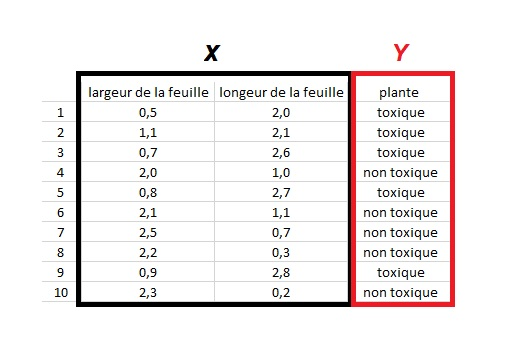

In [2]:
#Importer les  bibliothèques 
import numpy as np 
import matplotlib.pyplot as plt

# Features (les facteurs influencent la valeur Y)

In [3]:
# question 1 : Importer les variables X  ;
# indication : utiliser la bibliothèque Numpy 
x_entrer =np.array(([0.3,2],[1.1,2.1],[0.7,2.6],[02.0,1.0],[0.8,2.7],[2.1,1.1],[2.5,0.7],[2.2,0.3],[0.9,2.8],[2.3,0.2]),dtype=float)

# Target (c'est la valeur que l'on cherche  à prédire)

In [4]:
# données de sortie /  1 = plante toxique /  0 = plante non toxique
y = np.array(([1], [1], [1],[0],[1],[0],[0],[0],[1],[0]), dtype=float)

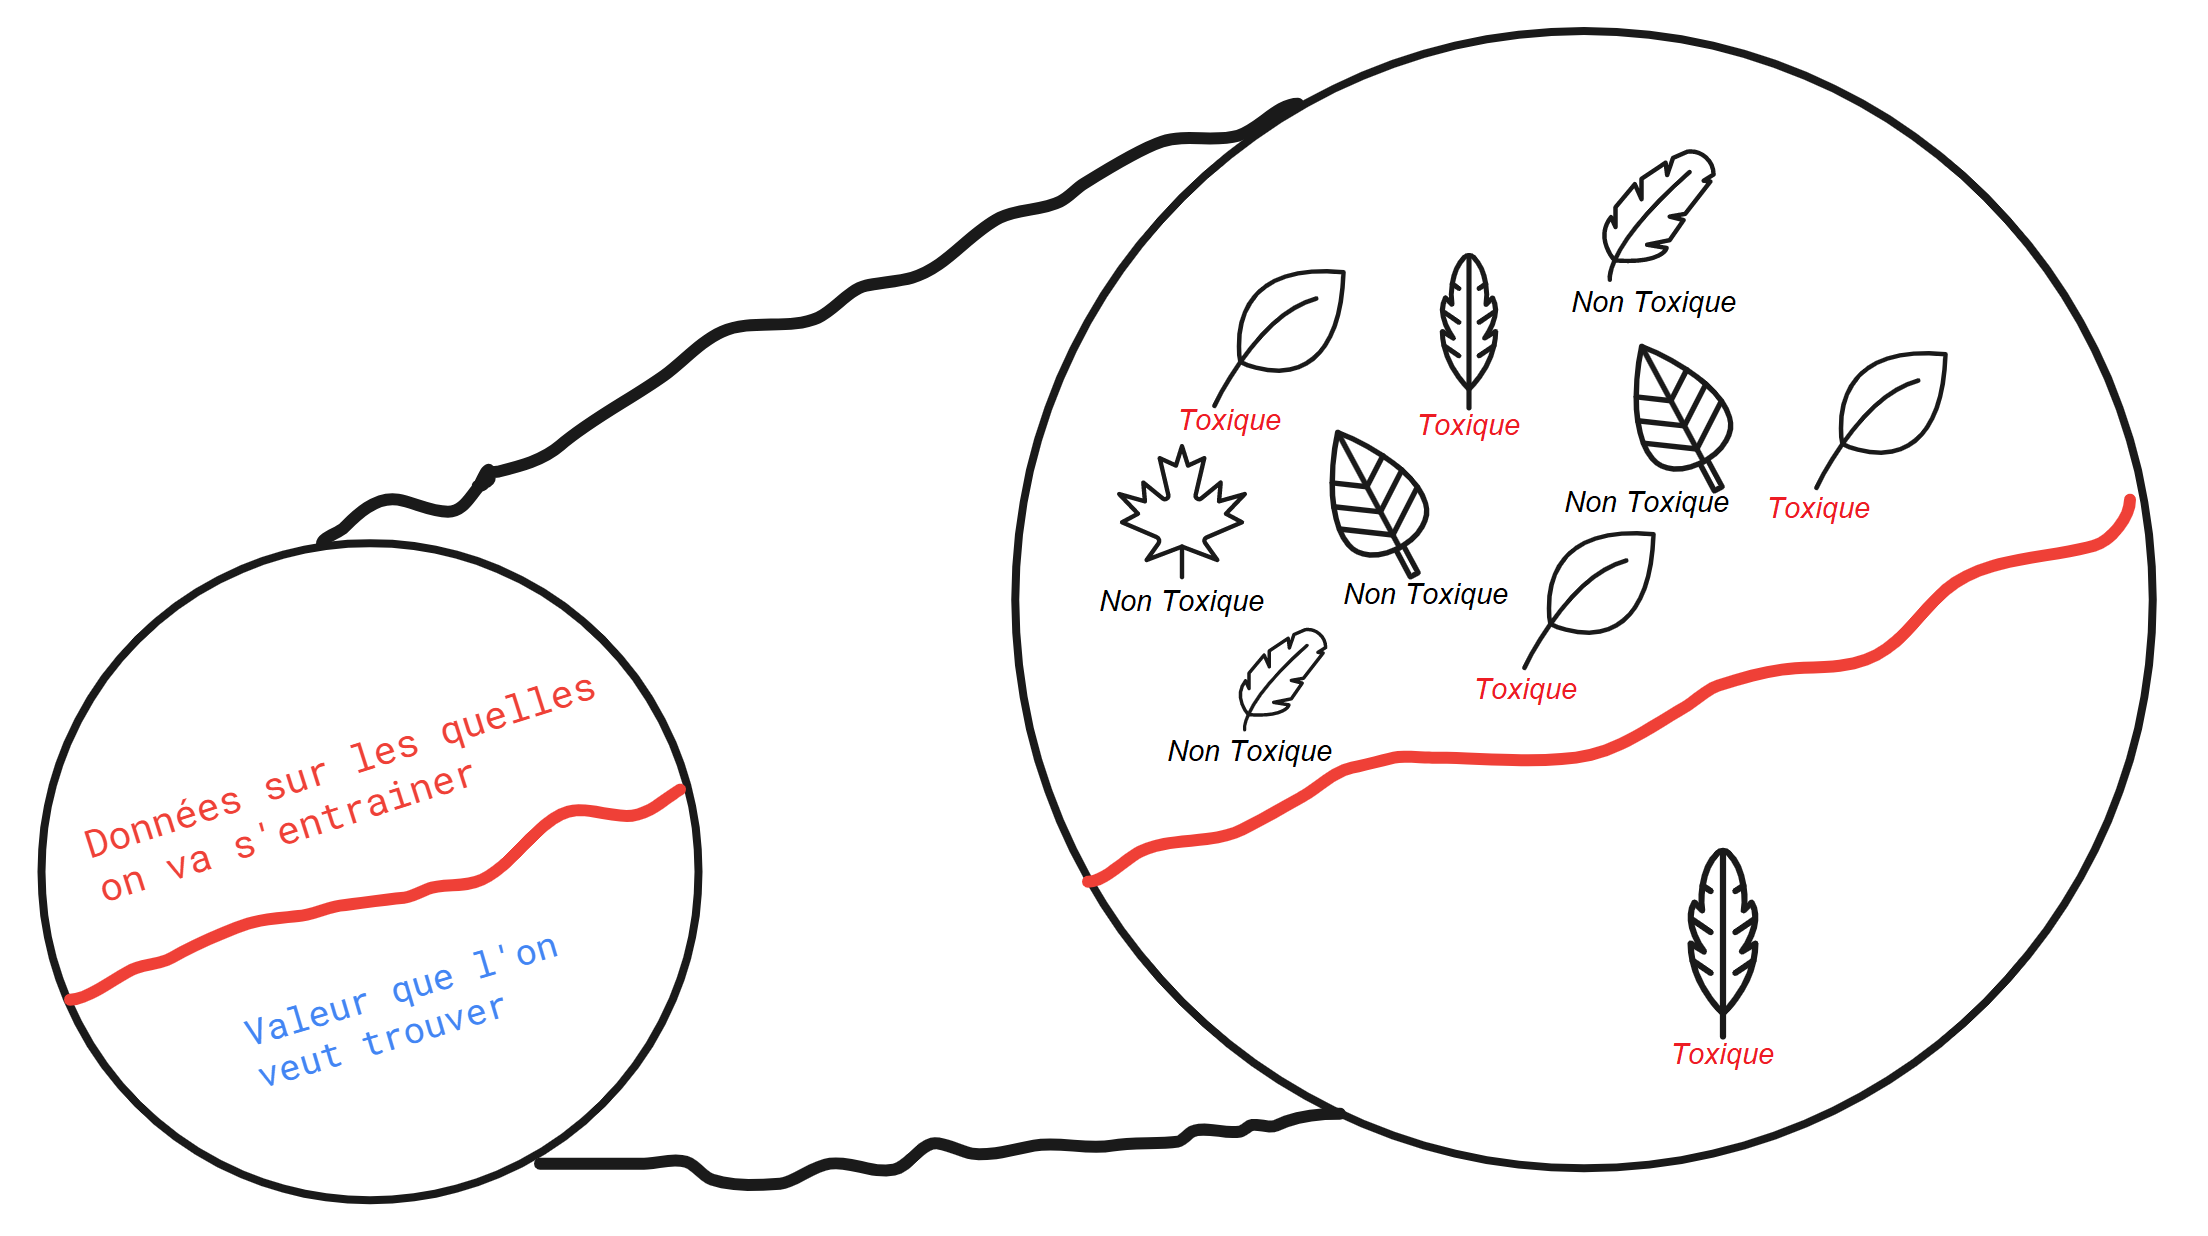

In [5]:
# question 2 : récupèrer le 9eme elements x-entrer
#indictaion : utiliser la fonction Split de Numpy
X = np.split(x_entrer,[9])[0] # Données sur lesquelles on va s'entrainer, les 9 premières de notre matrice
xPrediction = np.split(x_entrer,[9])[1]# Valeur que l'on veut trouver

In [6]:
X.shape

(9, 2)

In [7]:
xPrediction.shape

(1, 2)

<h2 style="text-align:center; font-family:Caveat;font-size:40px;">la création du modèle et ses paramètres
</h2>

<hr style="border:3px black solid">

## Réseau de Neurone à 1 Neurone : Le perceptron 

Le réseau de Neurones le plus simple qui existe porte le nom de
perceptron. Il est identique à la régression logistique,les entrées du neurone sont les features 𝒙 multipliées par des
paramètres 𝜽 à apprendre. 
Le calcul effectué par le neurone peut être divisé en deux étapes : 
   - **1)** Le neurone calcule la 𝒔𝒐𝒎𝒎𝒆 𝒛 de toutes les entrées 𝒛 =∑𝒙𝜽. C’est un calcul linéaire :
   - **2)** Le neurone passe z dans sa fonction d’activation. Ici la fonction sigmoïde (fonction Logistique). C’est un calcul  non-linéaire.:


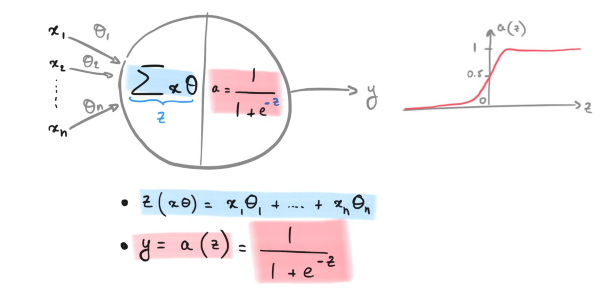

<h2 style=" font-family:Aparajita;font-size:20px;">1/ initialisation les poids (W) et le biais (b)</h2>

In [8]:
# question 3 : créer la fonction (initialisation) prenant un paramètre x (les variables d'entrer sous forme d'une matrice)
# en entrée et retournant deux paramètres w et b en sortie 
# indication : utiliser la fonction "np.random.randn()"
def initialisation(X):
    W = np.random.random(X.shape[1])
    b = np.random.random(1)
    return (W, b)

<h2 style=" font-family:Aparajita;font-size:20px;">2/ Fonction : sigmoïde (logistique)</h2>

In [22]:
# question 4 : créer la fonction logistique (sigmoïde) prenant trois paramètres (X,W,b) en entrée et retournant 
# deux paramètres w et b en sortie y=a(z)
def model(X, W, b):
    Z = X.dot(W)+b
    A = 1/(1+np.exp(-Z))
    return A

<h2 style=" font-family:Aparajita;font-size:20px;">3/ Fonction : Coût et son gradient
</h2>

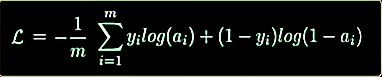

In [10]:
# question 5 : créer la fonction (log_loss) prenant deux paramètres (A,Y) en entrée et retournant la fonction cout
# indication : utiliser fonction "numpy.sum() , numpy.log"
def log_loss(A, y):
    L=-1/y.shape[0]*np.sum(y*np.log(A)+(1-y)*np.log(1-A))
    return L

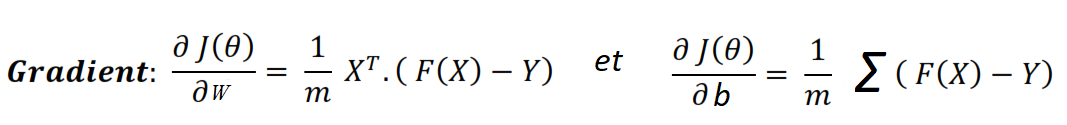

In [11]:
# question 6 : créer la fonction (gradients) prenant trois paramètres (A,X,y) en entrée et retournant 
# les gradients des poids (dw) et de biais (db)
# indication : utiliser fonction "numpy.dot() , numpy.sum()"
def gradients(A, X, y):
    dW = 1/X.shape[0]*X.T*(A-y)
    db = 1/len(y)*np.sum(A-y)
    return (dW, db)

<h2 style=" font-family:Aparajita;font-size:20px;">4/ Fonction : la mise à jour des poids 
</h2>

In [12]:
# question 7 : créer la fonction pour la mise à jour des poids (update) prenant cinq paramètres 
# (dW, db, W, b, taux_dapprentissage) en entrée .

def update(dW, db, W, b, taux_dappretissage):
    W = W-taux_dappretissage*dW
    b = b-taux_dappretissage*db
    return (W, b)

<h2 style=" font-family:Aparajita;font-size:20px;">5/ Fonction : prediction 
</h2>

In [13]:
# question 8 : créer la fonction (prediction) prenant trois paramètres (X,W, b) en entrée et retournant un message plante 
# toxique si la valeur de la fonction logistique >=0.5 (plante non toxique si la fonction logistique < 0.5 )
def prediction(X, W, b):
    teste = model(X,W,b)
    if teste>=0.5 :
         print("la plante est toxique")
    else :
        print("la plante est non toxique")

<hr style="border:2px solid black">

<h2 style=" font-family:Aparajita;font-size:20px;">6/ programmer un neurone artificiel
</h2>

In [34]:
from sklearn.metrics import accuracy_score

def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)
    # le tableau pour sauvegarder les valeurs d'erreurs
    Loss = []
    # la boucle pour minimiser l'erreur
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
    # afficher la courbe d’apprentissage : qui montre l’évolution de la fonction Coût
    plt.plot(Loss)
    plt.show()
    return (W, b)
  
  
    

In [35]:
W,b = artificial_neuron(x_entrer,y)

ValueError: operands could not be broadcast together with shapes (2,10) (10,10) 

<h2 style=" font-family:Aparajita;font-size:20px;">7/ La présentation des données
</h2>

NameError: name 'W' is not defined

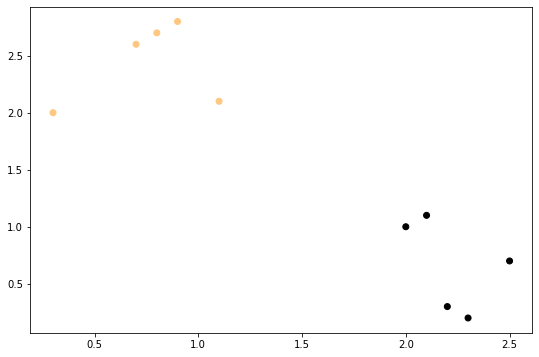

In [28]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(x_entrer[:,0], x_entrer[:, 1], c=y, cmap='copper')
x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='blue', lw=3)

 orange = plante toxique |   noir= plante non toxique

### la prédiction des nouvelles plantes

In [ ]:
plante_x=np.array([0.5,2])
print(plante_x)

[0.5 2. ]


a suivre .........